#TEXT CLASSIFICATION
IN THIS PROJECT WE WILL TRY TO CLASSIFY THE TEXT MESSAGES AS SPAM OR HAM(LEGITIMATE). IN THIS WE WILL USE THE FEATURES - LENGTH AND PUNCTUATIONS OF THE MESSAGES AND TRAIN THE MACHINE LEARNING MODEL. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/smsspamcollection.tsv', sep = '\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
len(df) #NO OF ROWS

5572

In [5]:
df.isnull().sum() #CHECK FOR NULL VALUES

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts() #COUNT OF DIFFERENT TYPES OF MESSAGES

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

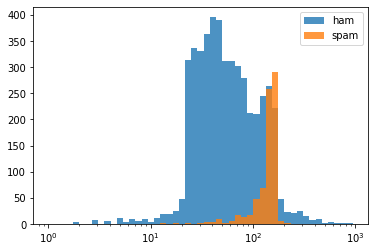

In [11]:
plt.xscale('log') #VISUALIZING SPAM AND HAM
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'],bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'],bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

FROM THE ABOVE TWO HISTORAMS WE CAN INFER THAT MORE NUMBER OF HAM ARE SHORTER AS COMPARED TO SPAM MESSAGES, AND IT IS QUITE OBVIOUS AS SPAM MESSAGES CONTAINS IRRELEVANT TEXTS WHICH MAKES THEM LONGER. 
EVEN FROM THE GRAPH WE CANNOT CLEARLY CLASSIFY  

In [12]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

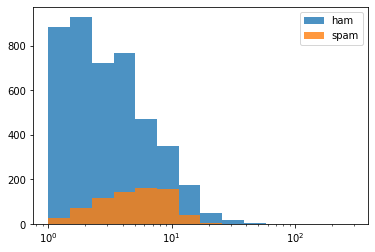

In [13]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [14]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

In [30]:
from sklearn.model_selection import train_test_split #SPLITTING UP OF TRAIN AND TEST DATA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


In [16]:
from sklearn.linear_model import LogisticRegression #LOGISTIC REGRESSION MODEL
lr_model = LogisticRegression(solver = 'lbfgs')
lr_model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
 from sklearn import metrics
 predictions = lr_model.predict(X_test)
 predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [18]:
y_test

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
4944    ham
3313    ham
3652    ham
14      ham
4758    ham
Name: label, Length: 1839, dtype: object

#EVALUATION

In [21]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


THE MODEL IS NOT PERFORMING WELL ON THE SPAM MESSAGES AS 241 SPAM MESSAGES ARE CLASSIFIED AS HAM

In [22]:
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [24]:
metrics.accuracy_score(y_test,predictions)

0.843936922240348

In [26]:
from sklearn.naive_bayes import MultinomialNB #NAIVE BAYES CLASSIFIER
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


In [27]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [28]:
from sklearn.svm import SVC
svc_model = SVC(gamma = 'auto')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


In [29]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839

